Project Description:
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables.  

Attribute Information:
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T


Bussiness/Social Implication:
    There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Steps to Follow for the Project: The dataset contains 25 features and 7752 samples
Below are the steps to follow for the project:

Import the required libraries and data.
Do the careful EDA analysis, preprocessing and feature engineering on the given data.
Build/Test multiple models on the same dataset.
Check underfitting/overfitting,  avoid underfitting or overfitting (bias/variance) , cross validation and all performance parameters(metrics) for all models depending on the problem type.
Try to achieve a model with good performance.
Select the best/final performing model and explain on what basis you have selected the particular model as a final model.
Do hyper parameter tuning on the final/best model or on all models.
Save the best model for production and convey on which basis you have chosen that model.
Make the documentation and write your findings in the same file i.e. ipynb

# Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets,linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import warnings 
warnings.filterwarnings('ignore')
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
import joblib
from sklearn.model_selection import cross_validate,KFold,cross_val_score
from sklearn.metrics import  roc_curve, roc_auc_score
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier)
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor


In [2]:
# Loading the dataset downloaded from kaggle
temp_dt=pd.read_csv('temperature.csv')
temp_dt.tail(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7742,18.0,30-08-2017,23.3,18.2,30.259682,86.565193,26.474403,17.289157,6.522731,94.203783,...,0.000000,0.000000,0.000000,37.4832,127.024,56.4448,1.231300,4435.611816,27.8,16.7
7743,19.0,30-08-2017,22.6,15.0,25.536045,78.779045,26.596280,17.856040,6.905963,54.030075,...,0.000000,0.000000,0.000000,37.5776,126.938,75.0924,1.767800,4495.473633,27.1,16.6
7744,20.0,30-08-2017,22.7,15.9,38.216373,94.428116,24.037222,15.772677,6.478060,112.580310,...,0.000000,0.000000,0.000000,37.6181,127.004,146.5540,4.729600,4554.965332,26.7,16.3
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.000000,0.000000,0.000000,37.5507,127.040,26.2980,0.572100,4456.024414,27.6,17.7
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.000000,0.000000,0.000000,37.5102,127.086,21.9668,0.133200,4441.803711,28.0,17.1
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [3]:
temp_dt.shape # to determine the shape of the dataset

(7752, 25)

In [4]:
temp_dt.info() # to determine the data types of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


# Data Cleaning and Transfroming (Exploratory Data Analysis)

In [5]:
# Checking for null values
temp_dt.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [6]:
# dropping the null values
temp_dt.dropna(inplace=True)

In [7]:
# Checking for null values after removing null values
temp_dt.isnull().any()

station             False
Date                False
Present_Tmax        False
Present_Tmin        False
LDAPS_RHmin         False
LDAPS_RHmax         False
LDAPS_Tmax_lapse    False
LDAPS_Tmin_lapse    False
LDAPS_WS            False
LDAPS_LH            False
LDAPS_CC1           False
LDAPS_CC2           False
LDAPS_CC3           False
LDAPS_CC4           False
LDAPS_PPT1          False
LDAPS_PPT2          False
LDAPS_PPT3          False
LDAPS_PPT4          False
lat                 False
lon                 False
DEM                 False
Slope               False
Solar radiation     False
Next_Tmax           False
Next_Tmin           False
dtype: bool

In [8]:
# Null values have been removed

In [9]:
# Converting Data data type and splitting date into year, month and Day using Lambda Function
temp_dt['Date']=pd.to_datetime(temp_dt['Date'])
temp_dt['Day']=temp_dt['Date'].apply(lambda x:x.day)
temp_dt['Month']=temp_dt['Date'].apply(lambda x:x.month)
temp_dt['Year']=temp_dt['Date'].apply(lambda x:x.year)
temp_dt.head()


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013


<AxesSubplot:>

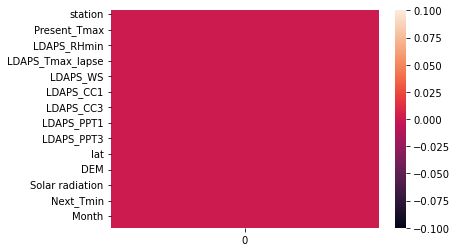

In [10]:
# Using Heat map to check for null values
sns.heatmap(temp_dt.isnull().sum().to_frame())

In [11]:
 temp_dt.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820,16.337375,7.068134,2014.991697
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256,8.216880,2.242389,1.410877
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000,7.000000,1.000000,2013.000000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000,8.000000,7.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000,16.000000,7.000000,2015.000000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000,24.000000,8.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000,31.000000,12.000000,2017.000000


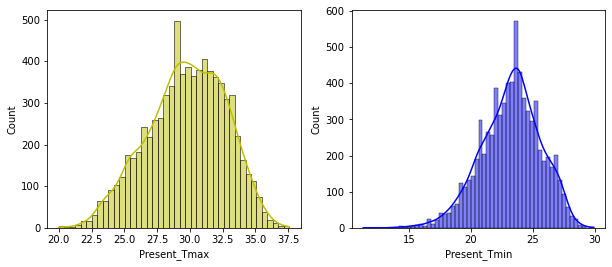

In [12]:
# Plotting histogram for present_Tmax and present_Tmin variables
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(temp_dt['Present_Tmax'],kde=True,color='y')
plt.subplot(1,2,2)
sns.histplot(temp_dt['Present_Tmin'],kde=True,color='b')
plt.show()

Bulk of the Present Max temp is between 27.5 and 32.5
Bulk of the present Min temp is between 22 to 26

array([[<AxesSubplot:title={'center':'station'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Present_Tmax'}>,
        <AxesSubplot:title={'center':'Present_Tmin'}>,
        <AxesSubplot:title={'center':'LDAPS_RHmin'}>],
       [<AxesSubplot:title={'center':'LDAPS_RHmax'}>,
        <AxesSubplot:title={'center':'LDAPS_Tmax_lapse'}>,
        <AxesSubplot:title={'center':'LDAPS_Tmin_lapse'}>,
        <AxesSubplot:title={'center':'LDAPS_WS'}>,
        <AxesSubplot:title={'center':'LDAPS_LH'}>],
       [<AxesSubplot:title={'center':'LDAPS_CC1'}>,
        <AxesSubplot:title={'center':'LDAPS_CC2'}>,
        <AxesSubplot:title={'center':'LDAPS_CC3'}>,
        <AxesSubplot:title={'center':'LDAPS_CC4'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT1'}>],
       [<AxesSubplot:title={'center':'LDAPS_PPT2'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT3'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT4'}>,
        <AxesSubplot:title={'center':'lat'

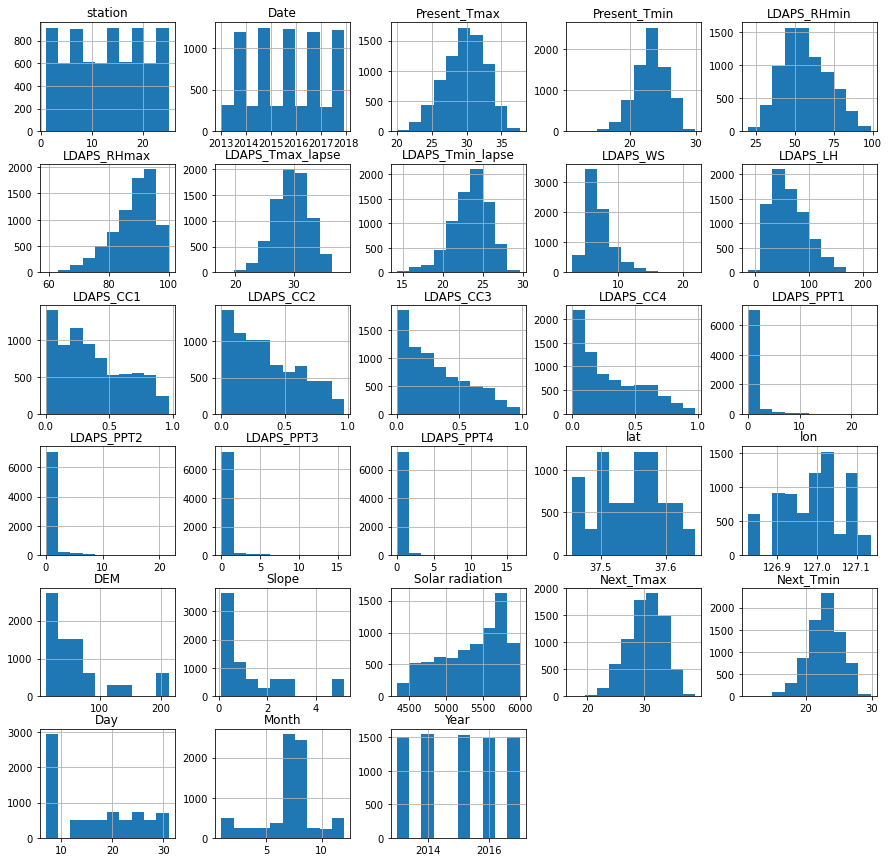

In [13]:
temp_dt.hist(bins=10,figsize=(15,15))

In [14]:
# function to Visualizing Categorical values using Scatter plot
def features_plot(Categorical_column):
    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1)
    col_name=['Present_Tmax','Present_Tmin','Solar radiation','Next_Tmax','Next_Tmin']
    sns.pointplot(y=Categorical_column,x='station', data=temp_dt,hue='Year',join=False)
    plt.title(f"{Categorical_column.title()} vs station per each year",fontweight="black",size=25,pad=10,)
    #col_values = avocado_dt[Categorical_column].value_counts()
    plt.tight_layout()

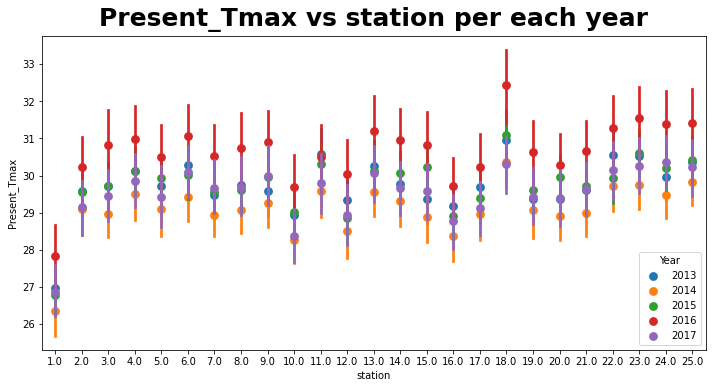

In [15]:
features_plot("Present_Tmax") # 

The highest Present maximum temperature was recorded in Station 18,Station 1 is coolest station over all timeframe.

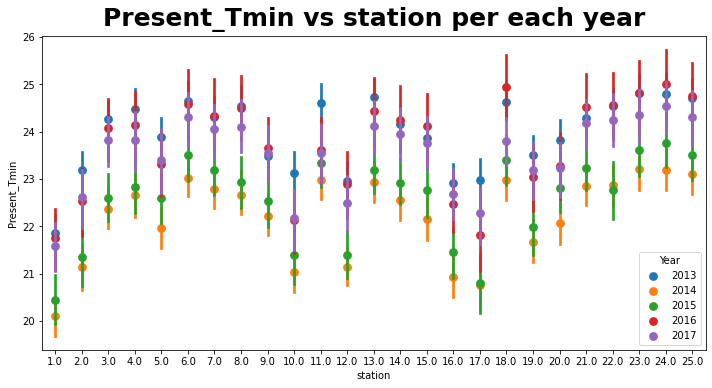

In [16]:
features_plot("Present_Tmin") # 

The higheest present Minimum temperature was recorded in Station 24,Station 1 is coolest station over all timeframe followed by station 17.
Year 2014 is coolest year of all time frame.

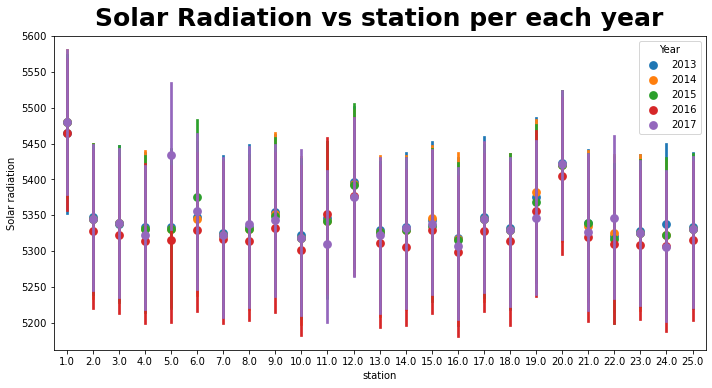

In [17]:
features_plot("Solar radiation") # 

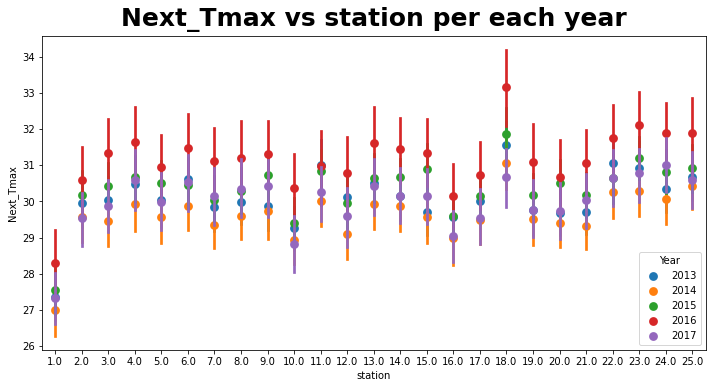

In [18]:
features_plot("Next_Tmax") #

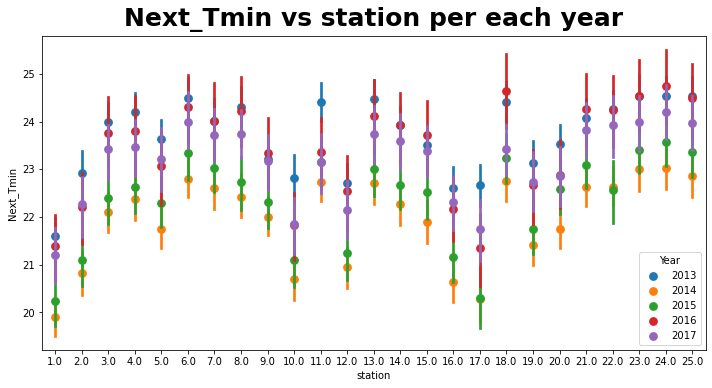

In [19]:
features_plot("Next_Tmin") #

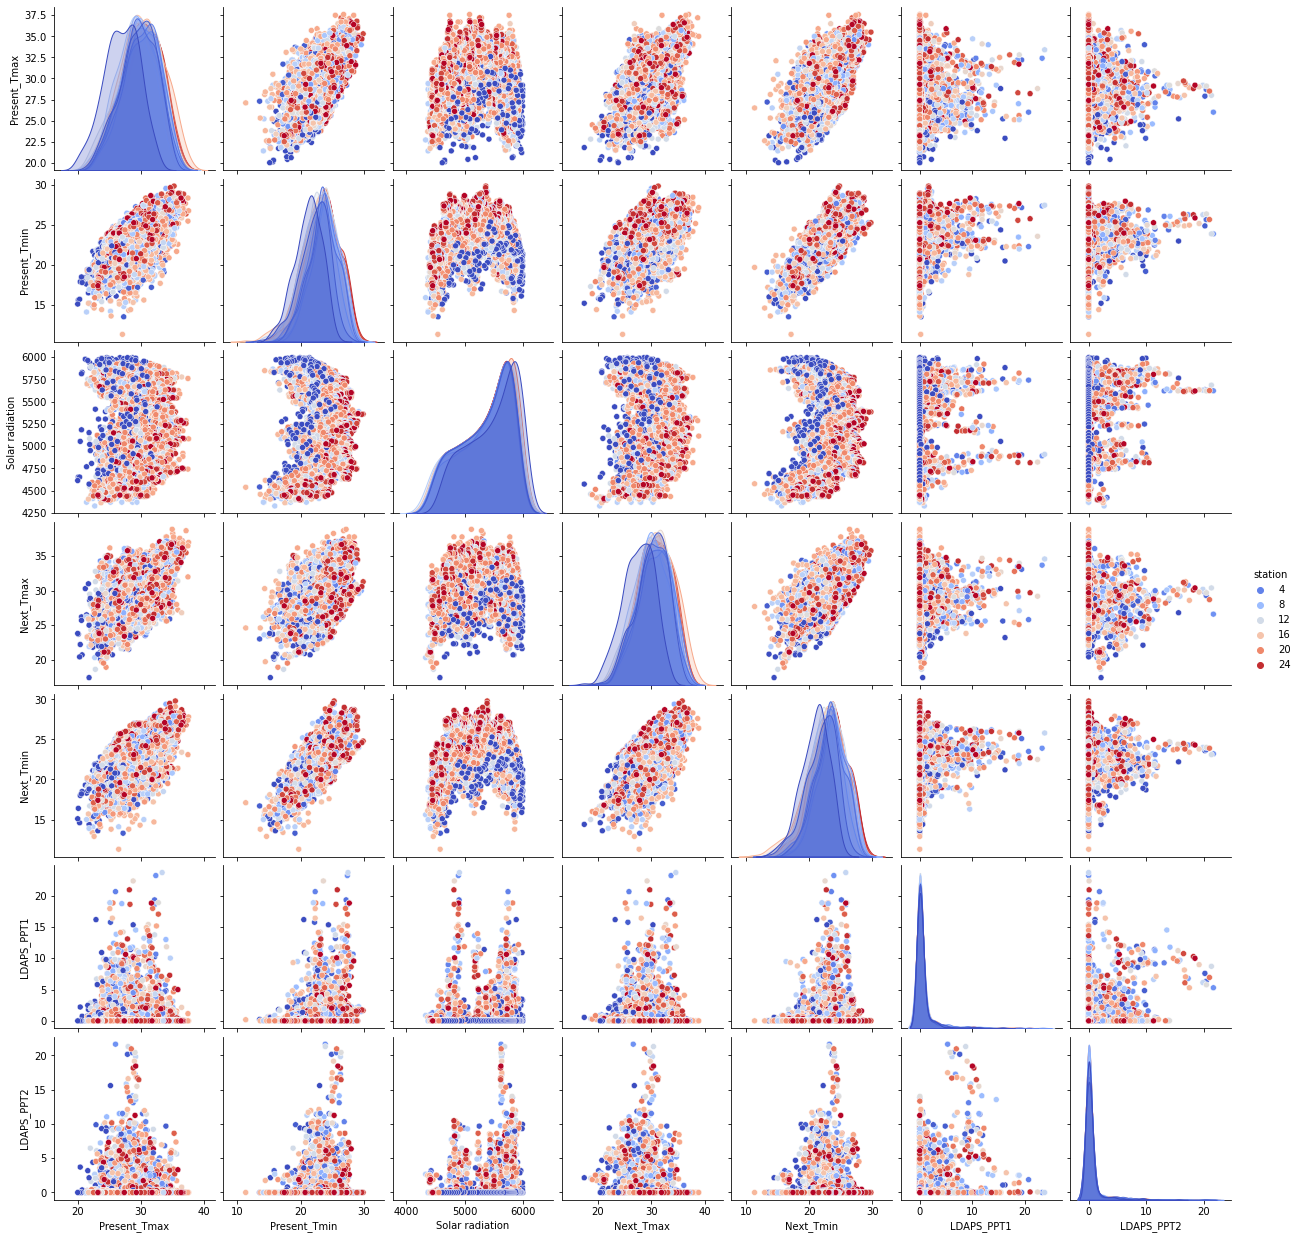

In [20]:
# Multivarite Analysis
sns.pairplot(temp_dt, vars=['Present_Tmax','Present_Tmin','Solar radiation','Next_Tmax','Next_Tmin','LDAPS_PPT1','LDAPS_PPT2'],hue='station',palette="coolwarm")
plt.show()

# Feature Selection/Extraction- to identify the most relevant features

In [21]:
# Droping unnecessary columns
temp_dt.drop(['Date'], axis=1, inplace=True)

In [22]:
# Checking for skewness of the data to determine outliers
temp_dt.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Day                 0.245563
Month              -0.703092
Year                0.013575
dtype: float64

In [23]:
# lLDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3,LDAPS_PPT4 are skwewd and will be transform to remove their skeweness
from sklearn.preprocessing import power_transform # using power Transformation method
temp_dt[['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']]=power_transform(temp_dt[['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']],method='yeo-johnson')

In [24]:
# Checking for skewness of the data after transformatio
temp_dt.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          1.451770
LDAPS_PPT2          1.637689
LDAPS_PPT3          1.814526
LDAPS_PPT4          2.041426
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Day                 0.245563
Month              -0.703092
Year                0.013575
dtype: float64

<AxesSubplot:>

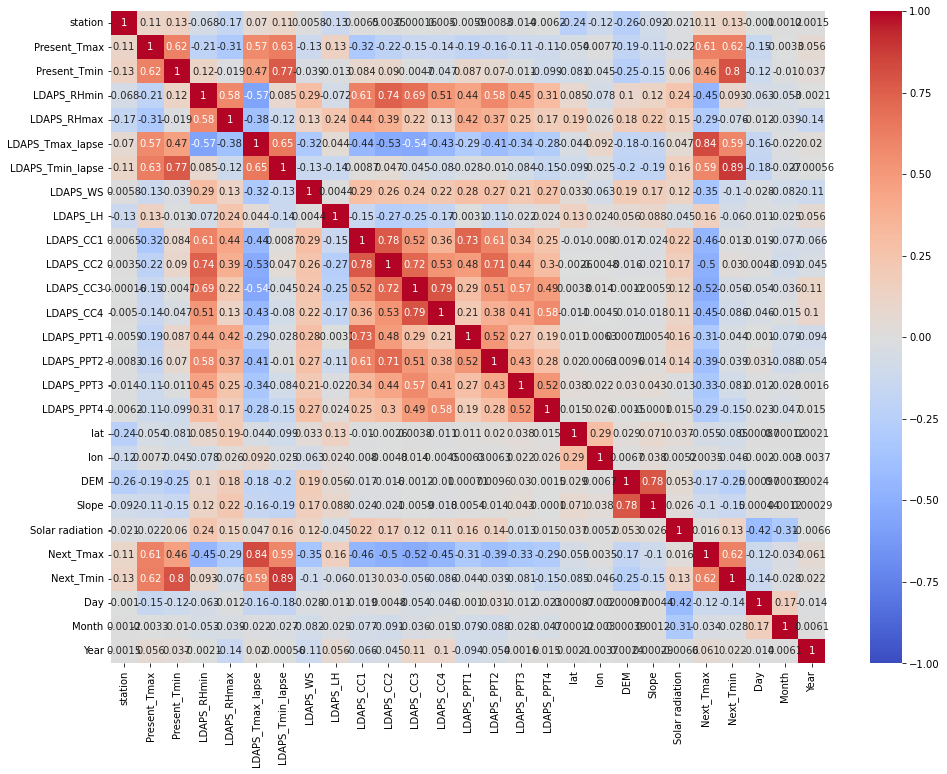

In [25]:
# Having a look at the correlation matrix
plt.figure(figsize=(16,12))
mask = np.zeros_like(temp_dt.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=temp_dt.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

# Data Preprocessing for Task 1

In [26]:
# remove the target and redundant features from the dataset
X = temp_dt.drop(['Next_Tmax'], axis=1)
y= temp_dt['Next_Tmax']

In [27]:
# Standardizing the dataset for X
from sklearn.preprocessing import StandardScaler
stdscalar= StandardScaler()
X_Scalar= stdscalar.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_Scalar, y, test_size = 0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6070, 26), (1518, 26), (6070,), (1518,))

# Data Preprocessing for Task 2 (Next_Tmin)

In [29]:
# remove the target and redundant features from the dataset
Xn = temp_dt.drop(['Next_Tmin'], axis=1)
yn= temp_dt['Next_Tmin']

In [30]:
# Standardizing the dataset for X
from sklearn.preprocessing import StandardScaler
stdscalar= StandardScaler()
Xn_Scalar= stdscalar.fit_transform(Xn)

In [31]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn_Scalar, yn, test_size = 0.20,random_state=42)
Xn_train.shape,Xn_test.shape,yn_train.shape,yn_test.shape

((6070, 26), (1518, 26), (6070,), (1518,))

# Build/Test multiple models on the same dataset for Next_Tmax


In [32]:
# Linear Regression
lreg=LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred_lreg= lreg.predict(X_test)
y_pred_lreg.shape

(1518,)

In [34]:
#Accuracy and various Metrics for the model
LR_testing=round(lreg.score(X_train, y_train)*100,2)
LR_mae=mean_absolute_error(y_pred_lreg,y_test)
LR_mse=mean_squared_error(y_pred_lreg,y_test)
LR_rmse=np.sqrt(mean_squared_error(y_pred_lreg,y_test))
LR_r2=r2_score(y_test,y_pred_lreg)*100
print('Mean absolute error  =>',LR_mae)
print('Mean squared error  =>',LR_mse)
print('Root Mean squared error  =>',LR_rmse)
print('R2 Score  =>',LR_r2)
print("Accuracy Score of Testing Data is =>",LR_testing)

Mean absolute error  => 1.0932625415888104
Mean squared error  => 2.03662075917265
Root Mean squared error  => 1.4271022244999305
R2 Score  => 78.37400489696176
Accuracy Score of Testing Data is => 80.21


In [35]:
# Create instances of all four classifier
rfc=RandomForestRegressor()
et =ExtraTreesRegressor() 
bmc = BaggingRegressor() 
abc = AdaBoostRegressor()
gbc = GradientBoostingRegressor()
xgb=XGBRegressor()

In [36]:
from sklearn import metrics
#Train the model using the training sets y_pred=clf.predict(X_test), prediction on test set
for clf in (rfc, et, bmc, abc, gbc,xgb):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('\n')                                        
    print(' Error of ', clf, ':' )
    print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
    print('Mean squared error :', mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')

    print(' R2 Score :')
    print(r2_score(y_test,y_pred)*100) 
    #print('=============================================================================================================='))



 Error of  RandomForestRegressor() :
Mean absolute error : 0.6892424242424237
Mean squared error : 0.8651533530961781
Root Mean Squared Error: 0.930136201368476


 R2 Score :
90.8133106798756


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.5957503293807633
Mean squared error : 0.6025166765480883
Root Mean Squared Error: 0.7762194770476248


 R2 Score :
93.60213597065508


 Error of  BaggingRegressor() :
Mean absolute error : 0.7474308300395256
Mean squared error : 1.0076458498023715
Root Mean Squared Error: 1.0038156453265568


 R2 Score :
89.30024447837047


 Error of  AdaBoostRegressor() :
Mean absolute error : 1.2488367929842223
Mean squared error : 2.3708615841885576
Root Mean Squared Error: 1.539760235942128


 R2 Score :
74.82484611888574


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.8870397280315043
Mean squared error : 1.3438029037674917
Root Mean Squared Error: 1.1592251307522157


 R2 Score :
85.73073809375782


 Error of  XGBRegressor(base

# Cross Validation for Next_Tmax

In [37]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, X_Scalar,y):
    rmse =(cross_val_score(model, X_Scalar,y, cv=6))
    return(rmse)


models = [RandomForestRegressor(),
         ExtraTreesRegressor(),
         BaggingRegressor(),
         AdaBoostRegressor(),
         GradientBoostingRegressor(),
         XGBRegressor(),]
          
          
names = [rfc, et, bmc, abc, gbc,xgb]
          
for model,name in zip(models,names):
          score = rmse_cv(model,X,y)
          print("{}  : {:.4f}, {:4f}".format(name,score.mean()*100,score.std()*100))

RandomForestRegressor()  : 70.3086, 7.237601
ExtraTreesRegressor()  : 70.8380, 7.815258
BaggingRegressor()  : 67.7306, 7.421545
AdaBoostRegressor()  : 65.7316, 6.101370
GradientBoostingRegressor()  : 72.8861, 6.549409
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)  : 70.9567, 7.667461


# Hyper Parameter Tuning : GridSearchCV  for Next_Tmax 

In [38]:
param_grid = {'n_estimators':[25, 50, 100, 150],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [39]:
grid_search = GridSearchCV(XGBRegressor(),param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
print('Best score:', grid_search.best_score_) #grid.cv_scores_
print('Best params:', grid_search.best_params_)

[23:23:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

[23:23:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

[23:23:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

[23:23:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

[23:23:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

[23:23:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

[23:23:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

[23:23:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

[23:23:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

[23:23:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

[23:23:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:23:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

XGBRegressor(base_score=0.5, booster='dart', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.100000001, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', ...)
Best score: 0.9355137167997588
Best params: {'booster': 'dart', 'eta': 0.1, 'gamma': 0.1, 'max_depth': 8, 'n_estimators': 150}


In [40]:
y_pred_grid=grid_search.best_estimator_.predict(X_test) # With best parameter
y_pred_grid

array([27.792032, 27.040789, 32.887634, ..., 30.357195, 23.278343,
       26.808723], dtype=float32)

In [41]:
print('MSE:',mean_squared_error(y_pred_grid,y_test))
print('MAE:',mean_absolute_error(y_pred_grid,y_test))
print('r2_score:',r2_score(y_pred_grid,y_test)*100)

MSE: 0.6137752267094981
MAE: 0.5943489692899078
r2_score: 92.7193852783135


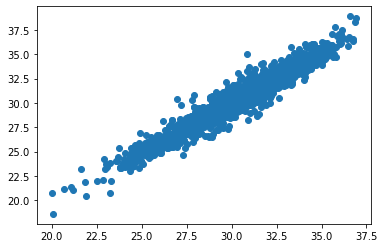

In [42]:
plt.scatter(y_pred_grid,y_test)

# Saving the best Model for  Next_Tmax

In [43]:
joblib.dump(grid_search.best_estimator_,'Next Time Temperature Forecast.obj')

['Next Time Temperature Forecast.obj']

,Y Test,Pred
5226,28.7,27.792032
6269,27.8,27.040789
1777,33.6,32.887634
1486,25.5,26.747293
591,29.4,28.655489
...,...,...
1770,32.5,33.337662
5499,34.7,33.816399
3057,30.0,30.357195
2661,22.0,23.278343


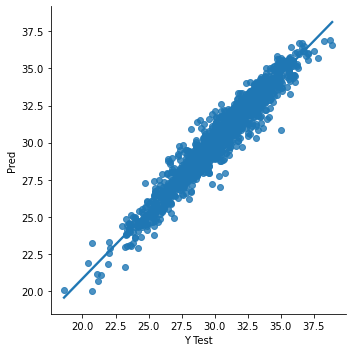

In [44]:
# Comparing the Actual price and predicted price
cmp_data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_grid},columns=['Y Test','Pred'])
#cmp_data = pd.DataFrame({'Y Test':np.array(y_test) , 'Pred':np.array(y_pred_grid)},index= range(len(y_test)))
sns.lmplot(x='Y Test',y='Pred',data=cmp_data,palette='rainbow')
cmp_data

# Machine Learning Model Building For Next_Tmin (Task 2)

In [45]:
# Linear Regression
lregn=LinearRegression()
lregn.fit(Xn_train,yn_train)

LinearRegression()

In [46]:
y_pred_lregn= lregn.predict(Xn_test)
y_pred_lregn.shape

(1518,)

In [47]:
#Accuracy and various Metrics for the model
LRn_testing=round(lregn.score(Xn_train, yn_train)*100,2)
LRn_mae=mean_absolute_error(y_pred_lregn,yn_test)
LRn_mse=mean_squared_error(y_pred_lregn,yn_test)
LRn_rmse=np.sqrt(mean_squared_error(y_pred_lregn,yn_test))
LRn_r2=r2_score(yn_test,y_pred_lregn)*100
print('Mean absolute error  =>',LRn_mae)
print('Mean squared error  =>',LRn_mse)
print('Root Mean squared error  =>',LRn_rmse)
print('R2 Score  =>',LRn_r2)
print("Accuracy Score of Testing Data is =>",LRn_testing)

Mean absolute error  => 0.7685376055174021
Mean squared error  => 0.9542273006405569
Root Mean squared error  => 0.9768455868972111
R2 Score  => 84.46689163336197
Accuracy Score of Testing Data is => 85.47


In [48]:
# Create instances of all four classifier
rfc=RandomForestRegressor()
et =ExtraTreesRegressor() 
bmc = BaggingRegressor() 
abc = AdaBoostRegressor()
gbc = GradientBoostingRegressor()
xgb=XGBRegressor()

In [49]:
from sklearn import metrics
#Train the model using the training sets y_pred=clf.predict(X_test), prediction on test set
for clf in (rfc, et, bmc, abc, gbc,xgb):
    clf.fit(Xn_train, yn_train)
    y_pred = clf.predict(Xn_test)
    print('\n')                                        
    print(' Error of ', clf, ':' )
    print('Mean absolute error :', mean_absolute_error(yn_test,y_pred_lregn))
    print('Mean squared error :', mean_squared_error(yn_test,y_pred_lregn))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(yn_test,y_pred_lregn)))
    print('\n')

    print(' R2 Score :')
    print(r2_score(yn_test,y_pred_lregn)*100) 
    #print('=============================================================================================================='))



 Error of  RandomForestRegressor() :
Mean absolute error : 0.7685376055174021
Mean squared error : 0.9542273006405569
Root Mean Squared Error: 0.9768455868972111


 R2 Score :
84.46689163336197


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.7685376055174021
Mean squared error : 0.9542273006405569
Root Mean Squared Error: 0.9768455868972111


 R2 Score :
84.46689163336197


 Error of  BaggingRegressor() :
Mean absolute error : 0.7685376055174021
Mean squared error : 0.9542273006405569
Root Mean Squared Error: 0.9768455868972111


 R2 Score :
84.46689163336197


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.7685376055174021
Mean squared error : 0.9542273006405569
Root Mean Squared Error: 0.9768455868972111


 R2 Score :
84.46689163336197


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.7685376055174021
Mean squared error : 0.9542273006405569
Root Mean Squared Error: 0.9768455868972111


 R2 Score :
84.46689163336197


 Error of  XGBRegressor(b

# Cross Validation for Next_Tmin

In [50]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, Xn_Scalar,y):
    rmse =(cross_val_score(model, Xn_Scalar,yn, cv=6))
    return(rmse)


models = [RandomForestRegressor(),
         ExtraTreesRegressor(),
         BaggingRegressor(),
         AdaBoostRegressor(),
         GradientBoostingRegressor(),
         XGBRegressor(),]
          
          
names = [rfc, et, bmc, abc, gbc,xgb]
          
for model,name in zip(models,names):
          score = rmse_cv(model,X,y)
          print("{}  : {:.4f}, {:4f}".format(name,score.mean()*100,score.std()*100))

RandomForestRegressor()  : 99.9789, 0.024942
ExtraTreesRegressor()  : 99.9679, 0.035048
BaggingRegressor()  : 99.9762, 0.025398
AdaBoostRegressor()  : 98.8966, 0.430733
GradientBoostingRegressor()  : 99.9876, 0.011861
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)  : 99.9853, 0.015996


# Hyper Parameter Tuning : GridSearchCV for Next_Tmin

In [51]:
param_grid = {'n_estimators':[25, 50, 100, 150],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [52]:
grid_search = GridSearchCV(XGBRegressor(),param_grid)
grid_search.fit(Xn_train, yn_train)
print(grid_search.best_estimator_)
print('Best score:', grid_search.best_score_) #grid.cv_scores_
print('Best params:', grid_search.best_params_)

[23:35:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

[23:35:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

[23:35:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

[23:35:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

[23:35:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

[23:35:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

[23:35:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

[23:35:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

[23:35:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

[23:35:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

[23:35:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

[23:35:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[23:35:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

In [53]:
yn_pred_grid=grid_search.best_estimator_.predict(Xn_test) # With best parameter
yn_pred_grid

array([24.5535  , 22.37114 , 23.798218, ..., 20.955458, 18.857868,
       21.42578 ], dtype=float32)

In [54]:
print('MSE:',mean_squared_error(yn_pred_grid,yn_test))
print('MAE:',mean_absolute_error(yn_pred_grid,yn_test))
print('r2_score:',r2_score(yn_pred_grid,yn_test)*100)

MSE: 0.3269598113299731
MAE: 0.43329038104835077
r2_score: 94.22348831549064


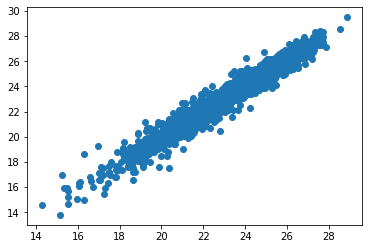

In [55]:
plt.scatter(yn_pred_grid,yn_test)

# Saving the best Model for Next_Tmin

In [56]:
joblib.dump(grid_search.best_estimator_,'Next Time Minimum Temperature Forecast.obj')

['Next Time Minimum Temperature Forecast.obj']

,Y Test,Pred
5226,24.5,24.553499
6269,21.5,22.371140
1777,24.7,23.798218
1486,22.5,21.940199
591,23.3,22.807549
...,...,...
1770,24.9,24.838577
5499,24.7,24.687849
3057,21.0,20.955458
2661,19.3,18.857868


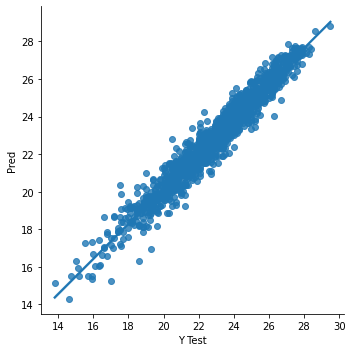

In [57]:
# Comparing the Actual price and predicted price
cmp_data = pd.DataFrame({'Y Test':yn_test , 'Pred':yn_pred_grid},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=cmp_data,palette='rainbow')
cmp_data